In [8]:
#Learn conv NN and RNN using Keras and Tensorflow
import tensorflow as tf
tf.__version__

'1.6.0'

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================]11493376/11490434 [==============================] - 19s 2us/step



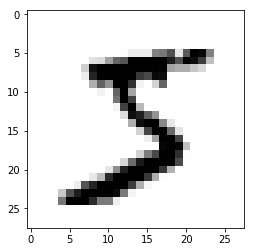

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary) #probs 255x255

In [12]:
#Need to normalise/scale the data
#This makes it easier for a system to train/process the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

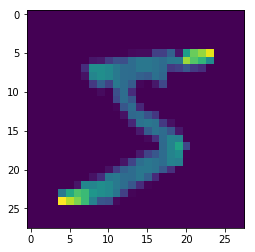

In [13]:
plt.imshow(x_train[0])
#Normalised data!

In [19]:
#Build model
model = tf.keras.models.Sequential() #Most common model - feed forward
#Currently 28x28 images. We want them to be flat (X x 0)
#Can use numpy.reshape, but Keras has nice Flatten() funct
#Now hidden layers
model.add(tf.keras.layers.Dense(128, input_shape=(28,28), activation=tf.nn.relu))#128 nodes
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Flatten()) #Need to flatten before final connected dense layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # 10 nodes because 10 numbers. Use softmax for probability dist.

#Compile the model!
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
#First run, 3 Hid layer, Adam, SCCE, epochs = 97.26% accuracy

In [20]:
#Fit the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================]60000/60000 [==============================] - 64s 1ms/step - loss: 0.2294 - acc: 0.9317

Epoch 2/3
60000/60000 [==============================]60000/60000 [==============================] - 62s 1ms/step - loss: 0.1098 - acc: 0.9673

Epoch 3/3
60000/60000 [==============================]60000/60000 [==============================] - 62s 1ms/step - loss: 0.0901 - acc: 0.9726



In [21]:
#Did the model overfit? Might need dropout layer
#Calculate the validation loss and val accuracy to see how good it generalised

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
#Expect test loss > train loss and test acc < train acc

10000/10000 [==============================]10000/10000 [==============================] - 4s 412us/step

0.1048642308562994 0.9678


In [39]:
#Save a model
save = 'mnist_RNN.model'
model.save(save)

In [40]:
#Load the model
new_model = tf.keras.models.load_model(save)

In [31]:
#Predictions
#Predictions always takes a list! Hence [x_test]
preds = new_model.predict([x_test])

Model predicts: 0
Actual image is a: 0


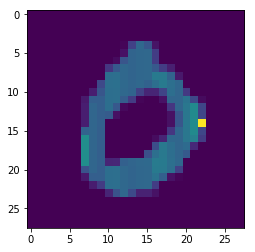

In [38]:
#Preds spits out all predicted probs of each 1-10 num for the number
#Print only the largest probability (argmax) for a selected image
import numpy as np

imageNum = 3 #Change this

print('Model predicts:', np.argmax(preds[imageNum]))
print('Actual image is a:', y_test[imageNum])
plt.imshow(x_test[imageNum])
plt.show()